In [2]:
import pandas as pd
import nltk
import math
import numpy as np
import matplotlib.pyplot as plt
#nltk.download('stopwords')
#nltk.download('punkt')

In [3]:
stopwords = nltk.corpus.stopwords.words('english')
data = pd.read_csv('annotations_metadata.csv', na_values = ['idk/skip'], index_col = 'file_id')
data.dropna(axis = 0, inplace = True)

In [4]:
#train
temp = data.head(math.floor(len(data)*0.7))
filenames = temp[temp.label == 'hate'].index

word_frequencies = {}
for file in filenames:
    ifile = open('./all_files/' + file + '.txt')
    try:
        file_contents = ifile.read()
    except:
        continue
    for word in nltk.word_tokenize(file_contents):
        word = word.lower()
        if word not in stopwords and word.isalpha() and len(word)>3:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1
    ifile.close()
word_frequencies = dict(sorted(word_frequencies.items(), key = lambda x : x[-1], reverse = True))

vulgar_words = list(word_frequencies.keys())[:250]
word_neighbours = {}
for file in filenames:
    ifile = open('./all_files/'+file+'.txt')
    try:
        file_contents = ifile.read()
    except:
        continue
    x = nltk.word_tokenize(file_contents)
    for i in range(len(x)):
        word = x[i].lower()
        if word in vulgar_words:
            if word not in word_neighbours:
                word_neighbours[word] = x[i-3:i+4]
            else:
                word_neighbours[word].extend(x[i-3:i+4])

In [5]:
#predict
test_file_count = math.ceil(len(data)*0.3)
filenames = data.tail(test_file_count).index
results = dict()
for file in filenames:
    ifile = open('./all_files/'+file+'.txt')
    try:
        file_contents = ifile.read()
    except:
        continue
    score, count = 0, 0
    x = nltk.word_tokenize(file_contents)
    for i in range(len(x)):
        word = x[i].lower()
        if word not in stopwords and word.isalpha():
            count += 1
            score += word_frequencies.get(word, 0)
        if word in vulgar_words:
            for _ in x[i-2:i+3]:
                if _ in word_neighbours[word]:
                    score += 25
    if count != 0:
        avg_score = score/count
    else:
        avg_score = 0
    results[file] = avg_score

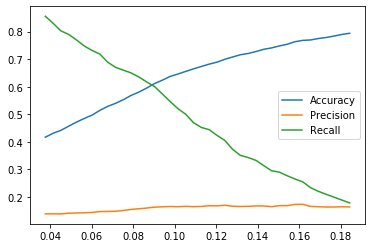

In [6]:
#analyse
max_score = max(results.values())
accuracy, precision, recall, cutoffs = list(), list(), list(), list()
for i in range(10, 50):
    tp, tn, fp, fn = 0, 0, 0, 0
    cutoff = i/max_score
    for k,v in results.items():
        normal_score = v/max_score
        if normal_score > cutoff:
            if data.loc[k, 'label'] == 'hate':
                tp += 1
            else:
                fp += 1
        else:
            if data.loc[k, 'label'] == 'noHate':
                tn += 1
            else:
                fn += 1
    accuracy.append((tp+tn)/(tp+tn+fp+fn))
    precision.append(tp/(tp+fp))
    recall.append(tp/(tp+fn))
    cutoffs.append(cutoff)
plt.plot(cutoffs, accuracy, label = 'Accuracy')
plt.plot(cutoffs, precision, label = 'Precision')
plt.plot(cutoffs, recall, label = 'Recall')
plt.legend()
plt.show()

In [7]:
print(word_frequencies)

{'white': 166, 'like': 94, 'black': 81, 'whites': 67, 'people': 62, 'blacks': 57, 'would': 55, 'race': 51, 'back': 41, 'jews': 40, 'want': 38, 'country': 33, 'think': 32, 'negro': 32, 'even': 31, 'never': 29, 'time': 29, 'good': 28, 'going': 28, 'know': 28, 'need': 27, 'negroes': 27, 'hate': 27, 'last': 26, 'world': 24, 'around': 24, 'every': 23, 'kids': 23, 'scum': 23, 'africa': 22, 'many': 22, 'women': 21, 'make': 21, 'live': 21, 'could': 21, 'look': 20, 'always': 19, 'much': 19, 'hell': 19, 'ireland': 19, 'hope': 18, 'stop': 18, 'living': 17, 'brown': 17, 'come': 17, 'school': 17, 'youtube': 17, 'soon': 16, 'countries': 16, 'jewish': 16, 'find': 16, 'thing': 15, 'little': 15, 'take': 15, 'children': 15, 'home': 15, 'something': 15, 'crime': 15, 'kill': 14, 'filth': 14, 'feel': 14, 'apes': 14, 'house': 14, 'news': 14, 'years': 14, 'well': 14, 'maybe': 14, 'really': 14, 'ever': 14, 'things': 14, 'nothing': 14, 'free': 13, 'right': 13, 'irish': 13, 'real': 13, 'liberals': 13, 'woman': 